# 2024-Spring Data Science Homework 3
## Due: 2024/04/19 23:59
### ID: 111590038
### Name: 卓柏辰 

### Import Library

In [28]:
import pandas as pd
import numpy as np
import requests
import calendar
import time


### 爬取一整年股票的資料

In [ ]:
def month_calendar(chinese_year, month):
    year = chinese_year + 1911
    calendar.setfirstweekday(6)
    date = str(calendar.month(year, month))
    day = date[38:].strip().replace('\n', ' ')
    day = day.replace('  ',' ').split(' ')
    return {month : day}

yearOfDay = []
for i in range(1, 13, 1):
    yearOfDay.append(month_calendar(112, i))

data = pd.DataFrame()
for dict in yearOfDay:
    for key, value in dict.items():
        for day in value:
            if int(day) < 10: day = "0" + day
            if key < 10: 
                date = "2023-" + "0" + str(key) + "-" + day
            else : 
                date = "2023-" + str(key) + "-" + day
            print(date + "\n--------")

            url = f'https://www.twse.com.tw/exchangeReport/MI_INDEX?response=json&date={date.replace('-', '')}&type=ALLBUT0999'
            req = requests.get(url)
            reqJson = req.json()
            if reqJson['stat'] == 'OK':
                stock = pd.DataFrame(reqJson['data9'], columns = reqJson['fields9'])
                stock['date'] = date 
                data = pd.concat([data, stock])
        time.sleep(5)

# write the data to my direction
data.to_csv('../DataScience/stock_data_2023.csv')

### Problem 1
請參考Lab5，繪製台積電在2023年的收盤價及開盤價的趨勢圖。

<Axes: title={'center': '2023 TSMC Stock chart'}, xlabel='date', ylabel='price'>

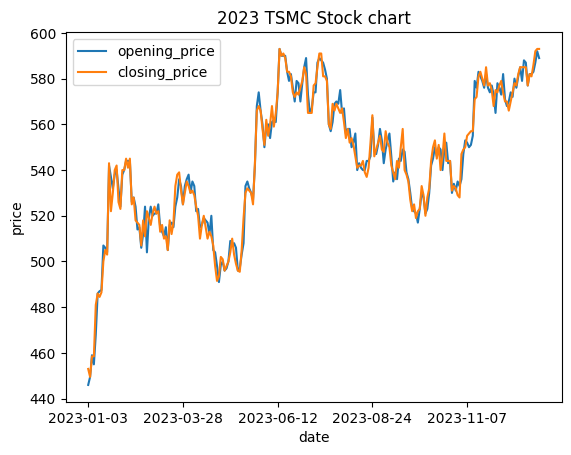

In [29]:
# 讀取dataset，並擷取所要的資料
stockData = pd.read_csv('C:\\Users\\bryan\\Desktop\\DataScience\\stock_data_2023.csv', index_col= 0)
stockData = stockData[['date', '證券名稱', '開盤價','收盤價']]
# 變更column的名稱
stockData = stockData.rename(columns= {'證券名稱':'name'})
stockData = stockData.rename(columns= {'開盤價':'opening_price'})
stockData = stockData.rename(columns= {'收盤價':'closing_price'})
# 將不符合的符號替換
stockData['opening_price'] = stockData['opening_price'].replace({',':'', '--':np.nan}, regex=True)
stockData['opening_price'] = stockData['opening_price'].astype('float64')
stockData['closing_price'] = stockData['closing_price'].replace({',':'', '--':np.nan}, regex=True)
stockData['closing_price'] = stockData['closing_price'].astype('float64')
# 取出台積電的資料，並把名稱的欄位蛋掉
stock_TSMC = stockData[stockData['name'] == '台積電'].drop('name', axis = 1)
# 空值處理，使用向前取值遞補 (stock_TSMC.fillna(method='ffill'))
stock_TSMC.ffill()
# 將日期設定為index(x座標)
stock_TSMC = stock_TSMC.set_index('date')
stock_TSMC.plot(title= "2023 TSMC Stock chart", ylabel= 'price')

### Problem2
手寫過程在紙上後拍照用Markdown附上
- Construct a decision tree using ID3 algorithm for the database given in the following table.
- Please document your process and results on paper, then take a picture and post it in this file.

| RID | age | income | student | credit_rating | Class: buys_computer |
| :-: | :-: | :-: | :-: | :-: | :-: |
| 1 | youth | high | no | fair | no |
| 2 | youth | high | no | excellent | no |
| 3 | middle_aged | high | no | fair | yes |
| 4 | senior | medium | no | fair | yes |
| 5 | senior | low | yes | fair | yes |
| 6 | senior | low | yes | excellent | no |
| 7 | middle_aged | low | yes | excellent | yes |
| 8 | youth | medium | no | fair | no |
| 9 | youth | low | yes | fair | yes |
| 10 | senior | medium | yes | fair | yes |
| 11 | youth | medium | yes | excellent | yes |
| 12 | middle_aged | medium | no | excellent | yes |
| 13 | middle_aged | high | yes | fair | yes |
| 14 | senior | medium | no | excellent | no |

### My Answer

### Problem3 
參考Lab6
1. 請計算　台積電、聯發科和聯電　2023年的股價平均值?
2. 請分析2023/1/1-2023/12/31期間與台積電絕對值相關度排行第5名的股票是哪一支股票？劃出這兩支股票的股價圖表 (圖表必須包含圖例、座標軸名稱、標題、大小為(7,7))